In [53]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
with open('train.json') as f:
  train_json_df = json.load(f)

In [4]:
train_df = pd.io.json.json_normalize(train_json_df) 

<ipython-input-4-6ae5475da184>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  train_df = pd.io.json.json_normalize(train_json_df)


In [11]:
sim_cols = ['requester_days_since_first_post_on_raop_at_request',
          'requester_days_since_first_post_on_raop_at_retrieval',
         'requester_number_of_comments_at_request', 
         'requester_number_of_comments_at_retrieval',
         'requester_username',
          'requester_user_flair',
         'unix_timestamp_of_request',
         'unix_timestamp_of_request_utc']

In [14]:
train_df[sim_cols].describe()

,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03
mean,16.417034,518.993205,115.098267,289.425743,1.342829e+09,1.342826e+09
std,70.651428,267.872623,193.318968,357.416133,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000,0.000000,1.297723e+09,1.297723e+09
25%,0.000000,279.009051,0.000000,8.000000,1.320469e+09,1.320466e+09
50%,0.000000,528.781939,24.000000,114.000000,1.342565e+09,1.342561e+09
75%,0.000000,776.226670,140.250000,479.000000,1.364618e+09,1.364614e+09
max,785.457685,1025.407593,994.000000,1000.000000,1.381552e+09,1.381523e+09


In [15]:
train_df[sim_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   requester_days_since_first_post_on_raop_at_request    4040 non-null   float64
 1   requester_days_since_first_post_on_raop_at_retrieval  4040 non-null   float64
 2   requester_number_of_comments_at_request               4040 non-null   int64  
 3   requester_number_of_comments_at_retrieval             4040 non-null   int64  
 4   requester_username                                    4040 non-null   object 
 5   requester_user_flair                                  994 non-null    object 
 6   unix_timestamp_of_request                             4040 non-null   float64
 7   unix_timestamp_of_request_utc                         4040 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 252.6+ KB


Summary:
- Number of comments on Reddit are higher at retrieval than at requester
- Requester username & requester user flair is a text field 
- only field with nulls is "requester_user_flair"

# Colname: requester_days_since_first_post_on_raop_at_request

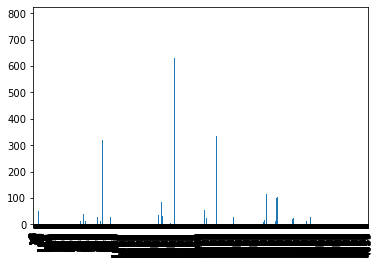

In [41]:
train_df['requester_days_since_first_post_on_raop_at_request'].plot(kind='bar')

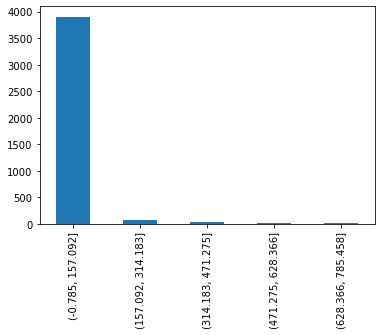

In [92]:
train_df['requester_days_since_first_post_on_raop_at_request_bins'] = pd.cut(train_df['requester_days_since_first_post_on_raop_at_request'],
                                                                 5)
train_df['requester_days_since_first_post_on_raop_at_request_bins'].value_counts().plot(kind='bar')

In [47]:
pd.DataFrame(train_df['requester_days_since_first_post_on_raop_at_request_bins'].value_counts()/len(train_df))

,requester_days_since_first_post_on_raop_at_request_bins
"(-0.785, 157.092]",0.966337
"(157.092, 314.183]",0.017079
"(314.183, 471.275]",0.009406
"(471.275, 628.366]",0.004208
"(628.366, 785.458]",0.002970


Summary:
- No null values, but majority of values between (-0.785 and 157). The negative value in this is confusing but it could be an outlier, should be ignored in analysis. Can build better buckets to understand this downward trend.

In [88]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_days_since_first_post_on_raop_at_request_bins'])

requester_days_since_first_post_on_raop_at_request_bins,"(-0.785, 157.092]","(157.092, 314.183]","(314.183, 471.275]","(471.275, 628.366]","(628.366, 785.458]"
requester_received_pizza,,,,,
False,2967,47,18,8,6
True,937,22,20,9,6


# Colname: requester_days_since_first_post_on_raop_at_retrieval

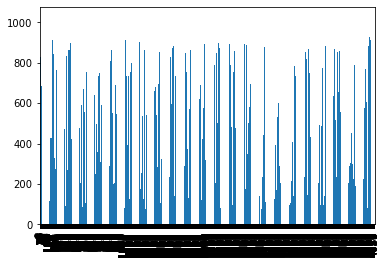

In [40]:
train_df['requester_days_since_first_post_on_raop_at_retrieval'].plot(kind='bar')

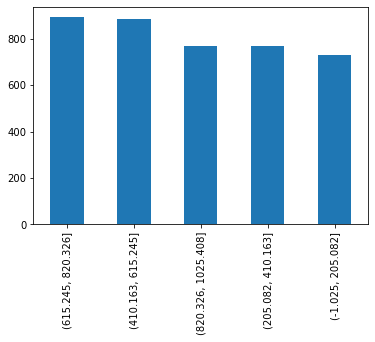

In [44]:
train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'] = pd.cut(train_df['requester_days_since_first_post_on_raop_at_retrieval'],
                                                                 5)
train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'].value_counts().plot(kind='bar')


In [48]:
pd.DataFrame(train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'].value_counts()/len(train_df))

,requester_days_since_first_post_on_raop_at_retrieval_bins
"(615.245, 820.326]",0.220792
"(410.163, 615.245]",0.219059
"(820.326, 1025.408]",0.190099
"(205.082, 410.163]",0.189851
"(-1.025, 205.082]",0.180198


Summary:
- This data feels well distributed, but noisy. There is no downward trend as compared to the # of days at request.Next step would be to understand the influence of this column on outcome vs. that of the request one. 

In [93]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_days_since_first_post_on_raop_at_retrieval_bins'])

requester_days_since_first_post_on_raop_at_retrieval_bins,"(-1.025, 205.082]","(205.082, 410.163]","(410.163, 615.245]","(615.245, 820.326]","(820.326, 1025.408]"
requester_received_pizza,,,,,
False,606,601,681,654,504
True,122,166,204,238,264


# Colname: requester_number_of_comments_at_request

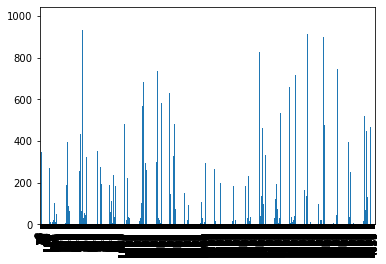

In [39]:
train_df['requester_number_of_comments_at_request'].plot(kind='bar')

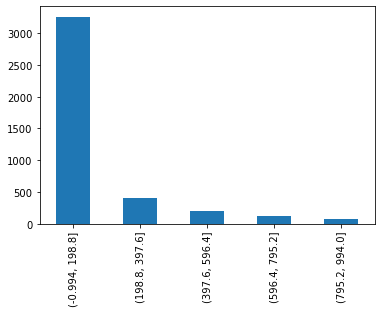

In [36]:
train_df['requester_number_of_comments_at_request_bins'] = pd.cut(train_df['requester_number_of_comments_at_request'],
                                                                 5)
train_df['requester_number_of_comments_at_request_bins'].value_counts().plot(kind='bar')

In [49]:
pd.DataFrame(train_df['requester_number_of_comments_at_request_bins'].value_counts()/len(train_df))

,requester_number_of_comments_at_request_bins
"(-0.994, 198.8]",0.807426
"(198.8, 397.6]",0.098267
"(397.6, 596.4]",0.047525
"(596.4, 795.2]",0.029208
"(795.2, 994.0]",0.017574


Summary:
- Majority of the values lie between -0.994, 198.8. This distribution seems similar to days since first post on RAOP, as collected on request time. Next step: look into the first bucket in more detail.

In [94]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_number_of_comments_at_request_bins'])

requester_number_of_comments_at_request_bins,"(-0.994, 198.8]","(198.8, 397.6]","(397.6, 596.4]","(596.4, 795.2]","(795.2, 994.0]"
requester_received_pizza,,,,,
False,2477,290,145,84,50
True,785,107,47,34,21


# Colname: requester_number_of_comments_at_retrieval

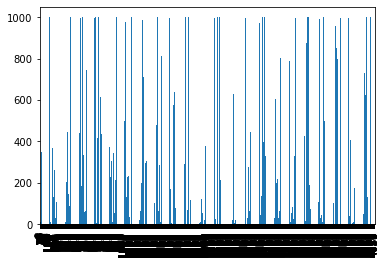

In [42]:
train_df['requester_number_of_comments_at_retrieval'].plot(kind='bar')

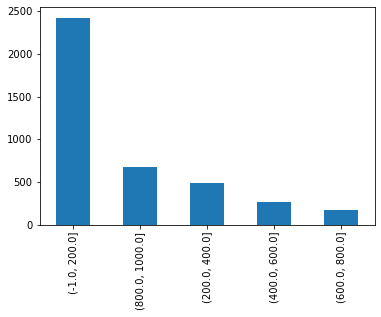

In [50]:
train_df['requester_number_of_comments_at_retrieval_bins'] = pd.cut(train_df['requester_number_of_comments_at_retrieval'],
                                                                 5)
train_df['requester_number_of_comments_at_retrieval_bins'].value_counts().plot(kind='bar')


In [51]:
pd.DataFrame(train_df['requester_number_of_comments_at_retrieval_bins'].value_counts()/len(train_df))

,requester_number_of_comments_at_retrieval_bins
"(-1.0, 200.0]",0.599505
"(800.0, 1000.0]",0.167822
"(200.0, 400.0]",0.122277
"(400.0, 600.0]",0.066089
"(600.0, 800.0]",0.044307


Summary:
- This seems like a good highly left skewed dataset. First bucket seems to have most amount of datapoints, this bucket should be further investigated.

In [95]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_number_of_comments_at_retrieval_bins'])

requester_number_of_comments_at_retrieval_bins,"(-1.0, 200.0]","(200.0, 400.0]","(400.0, 600.0]","(600.0, 800.0]","(800.0, 1000.0]"
requester_received_pizza,,,,,
False,1913,352,188,135,458
True,509,142,79,44,220


# Colname: requester_username

In [21]:
train_df.requester_username.value_counts()

knockerwocky       1
Brizzwold          1
BallerinaBonzai    1
juniormantis       1
Ticking__bomb      1
                  ..
MitchellHaaland    1
effigies           1
ghostofahorse      1
staglord           1
Cthomte            1
Name: requester_username, Length: 4040, dtype: int64

Summary:
- Each user has 1 requester username -> this seems weird as this seems like one person only posts once?
- Next step: analyze type of requester username but that seems like a stretch and not directly related to the request

In [96]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_username'])

requester_username,-Magitek-Armor-,-idk,-notagirl-,0b4m4,122david,124418609219,13853211,1level1,20TL12III,20greenshades,...,zimpirate,zombiehannah,zombisaurusrex,zomboi,zooey_roses,zpoehlein12,zqxwcevrbt,zratz3171,ztfreeman,zuggle
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,1,1,1,1
True,0,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


# colname: requester_user_flair

In [22]:
train_df.requester_user_flair.value_counts()

shroom    935
PIF        59
Name: requester_user_flair, dtype: int64

- There are only two types "requester_user_flair" however, majority of these values are null. Given that this is binary, this might be helpful for the same scenario

In [97]:
# relation with outcome variable
pd.crosstab(train_df.requester_received_pizza, train_df['requester_user_flair'])

requester_user_flair,PIF,shroom
requester_received_pizza,,
True,59,935


- This is interesting that only values of success in dependent variable have `requester_user_flair`, as per training dataframe

# colname: unix_timestamp_of_request

In [52]:
train_df.unix_timestamp_of_request.value_counts()

1.380356e+09    2
1.313532e+09    1
1.363909e+09    1
1.347131e+09    1
1.363907e+09    1
               ..
1.336100e+09    1
1.347143e+09    1
1.319319e+09    1
1.336094e+09    1
1.308624e+09    1
Name: unix_timestamp_of_request, Length: 4039, dtype: int64

In [55]:
# Need to change format of unix timestamp of request, currently it's a float
train_df['timestamp_converted'] = pd.to_datetime(train_df['unix_timestamp_of_request'],unit='s')
train_df.timestamp_converted.value_counts()

2013-09-28 08:05:44    2
2013-08-05 18:21:42    1
2012-09-07 04:26:55    1
2011-12-24 16:01:26    1
2013-03-04 22:45:22    1
                      ..
2011-10-18 12:44:38    1
2012-04-13 06:50:50    1
2013-08-15 00:11:19    1
2011-08-06 15:09:47    1
2012-07-07 01:21:38    1
Name: timestamp_converted, Length: 4039, dtype: int64

In [81]:
# distribution by year
train_df.timestamp_converted.dt.year.value_counts()

2012    1493
2013    1313
2011    1234
Name: timestamp_converted, dtype: int64

In [98]:
# relation between year & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.year)

timestamp_converted,2011,2012,2013
requester_received_pizza,,,
False,863,1141,1042
True,371,352,271


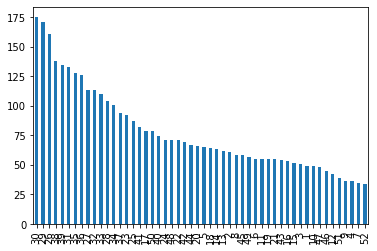

In [85]:
# distribution by week in year
train_df.timestamp_converted.dt.week.astype(int).value_counts().plot(kind='bar')

In [87]:
train_df.timestamp_converted.dt.week.value_counts()

30    175
29    171
26    161
38    138
39    134
31    133
35    128
36    126
27    113
32    113
33    110
28    104
34    101
37     94
23     92
25     87
41     82
17     79
50     79
40     74
24     71
48     71
22     71
42     69
44     67
20     66
5      65
18     64
14     63
13     62
2      61
8      58
45     58
49     57
6      55
11     55
19     55
21     55
43     54
16     53
15     52
3      51
1      49
10     49
47     48
46     45
12     42
51     39
9      36
4      36
7      35
52     34
Name: timestamp_converted, dtype: int64

In [99]:
# relation between week year & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.week)

timestamp_converted,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,32,46,40,32,45,33,31,42,34,35,...,42,53,42,36,35,57,43,63,28,19
True,17,15,11,4,20,22,4,16,2,14,...,12,14,16,9,13,14,14,16,11,15


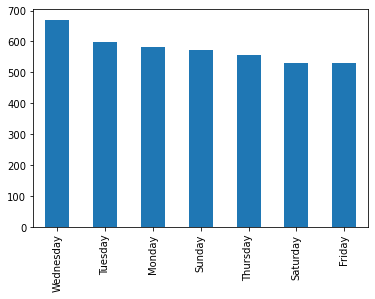

In [74]:
# distribution by weekday
train_df.timestamp_converted.dt.day_name().value_counts().plot(kind='bar')

In [75]:
train_df.timestamp_converted.dt.day_name().value_counts()/len(train_df)

Wednesday    0.165842
Tuesday      0.148267
Monday       0.144059
Sunday       0.141832
Thursday     0.137624
Saturday     0.131436
Friday       0.130941
Name: timestamp_converted, dtype: float64

In [101]:
# relation between week day & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.day_name())

timestamp_converted,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
requester_received_pizza,,,,,,,
False,393,430,414,439,391,461,518
True,136,152,117,134,165,138,152


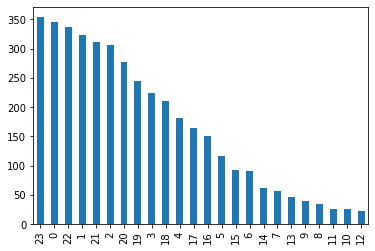

In [80]:
# distribution by hour
train_df.timestamp_converted.dt.hour.value_counts().plot(kind='bar')

In [79]:
train_df.timestamp_converted.dt.hour.value_counts()

23    354
0     346
22    336
1     324
21    312
2     306
20    277
19    244
3     224
18    210
4     181
17    164
16    150
5     117
15     93
6      91
14     62
7      56
13     47
9      39
8      35
11     25
10     25
12     22
Name: timestamp_converted, dtype: int64

In [102]:
# relation between hour & outcome 
pd.crosstab(train_df.requester_received_pizza, train_df.timestamp_converted.dt.hour)

timestamp_converted,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
requester_received_pizza,,,,,,,,,,,,,,,,,,,,,
False,262,224,239,177,139,101,71,46,30,31,...,45,62,105,116,152,176,212,236,268,262
True,84,100,67,47,42,16,20,10,5,8,...,17,31,45,48,58,68,65,76,68,92


Summary
- Majority posts seem to be on Wednesdays
- Hour of the day seems to have an effect, most requests after 6pm 
- Weeks 26 to 39 make up majority of the data

# colname: requester_received_pizza (dependent)

In [28]:
# outcome variable
train_df.requester_received_pizza.value_counts()

False    3046
True      994
Name: requester_received_pizza, dtype: int64

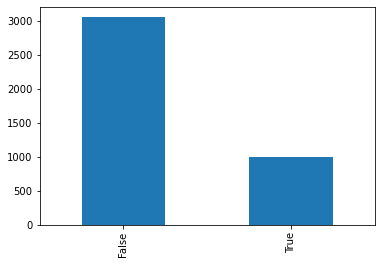

In [30]:
train_df.requester_received_pizza.value_counts().plot(kind='bar')